In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
filepath = "DC_Properties.csv"
dc_df = pd.read_csv(filepath)
dc_df['PRICE'].head()

C:\Users\dkim2\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0    1095000.0
1          NaN
2    2100000.0
3    1602000.0
4          NaN
Name: PRICE, dtype: float64

In [7]:
dc_df.dropna(subset = ["PRICE"], inplace=True)
dc_df['PRICE'].head(10)

0     1095000.0
2     2100000.0
3     1602000.0
5     1950000.0
7     1050000.0
8     1430000.0
14    1325000.0
16    1240000.0
19     592250.0
20      33232.0
Name: PRICE, dtype: float64

In [8]:
dc_df['PRICE'].describe()

count    9.821600e+04
mean     9.313516e+05
std      7.061325e+06
min      1.000000e+00
25%      2.400000e+05
50%      3.999990e+05
75%      6.520000e+05
max      1.374275e+08
Name: PRICE, dtype: float64

In [11]:
#Using Method 1

mean = dc_df['PRICE'].mean()

std = dc_df['PRICE'].std()

z_price = (dc_df['PRICE'] - mean)/std

In [12]:
mean, std

(931351.5949336156, 7061324.955612032)

In [13]:
z_price.head()

0    0.023175
2    0.165500
3    0.094975
5    0.144257
7    0.016803
Name: PRICE, dtype: float64

In [15]:
#Using Method 2
scaler = StandardScaler()

dc_zscore = scaler.fit_transform(dc_df[['PRICE']])

In [17]:
dc_zscore.mean(), dc_zscore.std()

(-4.630074029551846e-18, 1.0)

In [19]:
dc_z_score = pd.Series(dc_zscore.reshape(-1))

In [20]:
dc_z_score.head()

0    0.023175
1    0.165501
2    0.094975
3    0.144258
4    0.016803
dtype: float64

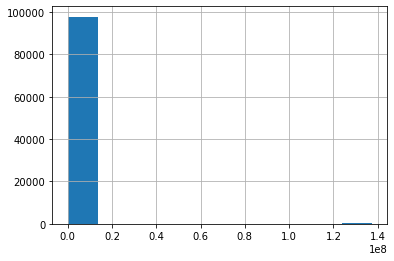

In [21]:
dc_df['PRICE'].hist()

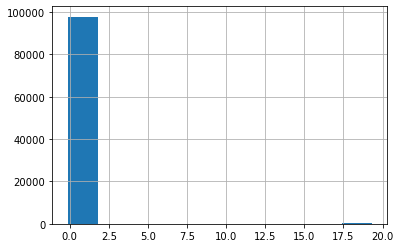

In [22]:
dc_z_score.hist()

In [23]:
#Min-max Scaling
minmax_sc = MinMaxScaler()

In [24]:
dc_minmax = minmax_sc.fit_transform(dc_df[['PRICE']])

In [25]:
dc_minmax.mean(), dc_minmax.std()

(0.006777030046710401, 0.0513819049810315)

In [26]:
dc_mm = pd.Series(dc_minmax.reshape(-1))

In [27]:
dc_mm.head()

0    0.007968
1    0.015281
2    0.011657
3    0.014189
4    0.007640
dtype: float64

In [28]:
dc_mm.min(), dc_mm.max()

(0.0, 0.9999999999999999)

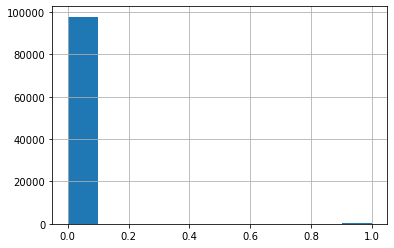

In [29]:
dc_mm.hist()